In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("employee_churn_data.csv")
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


"department" - çalışanın ait olduğu departman.

"promoted" - çalışan önceki 24 ay içinde terfi etmişse 1, aksi takdirde 0.

"review" - çalışanın son değerlendirmesinde aldığı bileşik puan; 0 ila 1.

"projects" - çalışanın kaç projede yer aldığı.

"salary" - gizlilik nedeniyle maaş kademelendirilmiştir: düşük, orta, yüksek.

"tenure" - çalışanın şirkette kaç yıldır çalıştığı.

"satisfaction" - anketlere dayalı olarak çalışan memnuniyeti seviyesi; 0 ila 1.

"bonus" - çalışan bonus almışsa 1, aksi takdirde 0.

"avg_hrs_month" - çalışanın bir ay içinde çalıştığı ortalama saat.

"left" - çalışan işten ayrılmışsa "yes", aksi takdirde "no".

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [5]:
df["left"].value_counts()
#sirketten ayrilanlari cagirip value_counts dersek kac kis ayrilmis getiriyor

no     6756
yes    2784
Name: left, dtype: int64

In [6]:
df["left"].value_counts(normalize=True)*100
#normalize True dersek oran, *100 dersek yuzdeligini veriyor

no     70.81761
yes    29.18239
Name: left, dtype: float64

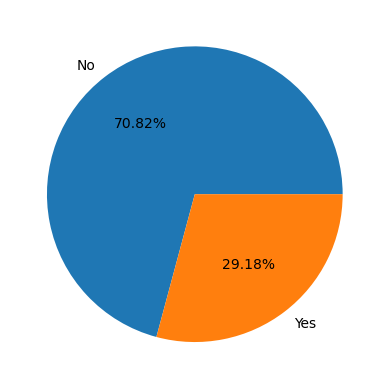

In [10]:
plt.pie(df["left"].value_counts(), labels=["No", "Yes"], autopct = "%.02f%%")
#sadece columnu yazarsam calismaz. value_counts eklemem lazim
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

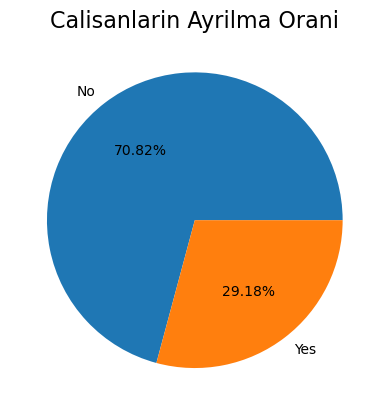

In [13]:
plt.pie(df["left"].value_counts(), labels=["No", "Yes"], autopct = "%.02f%%")
plt.title("Calisanlarin Ayrilma Orani", fontsize=16)
plt.show

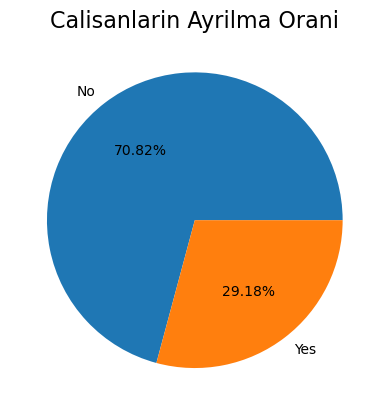

In [17]:
plt.pie(df["left"].value_counts(), labels=["No", "Yes"], autopct = "%.02f%%")
plt.title("Calisanlarin Ayrilma Orani", fontsize=16);
#plt.show
plt.show yerine ; kullanirsak en sona, acyazilar cikmaz

<function matplotlib.pyplot.show(close=None, block=None)>

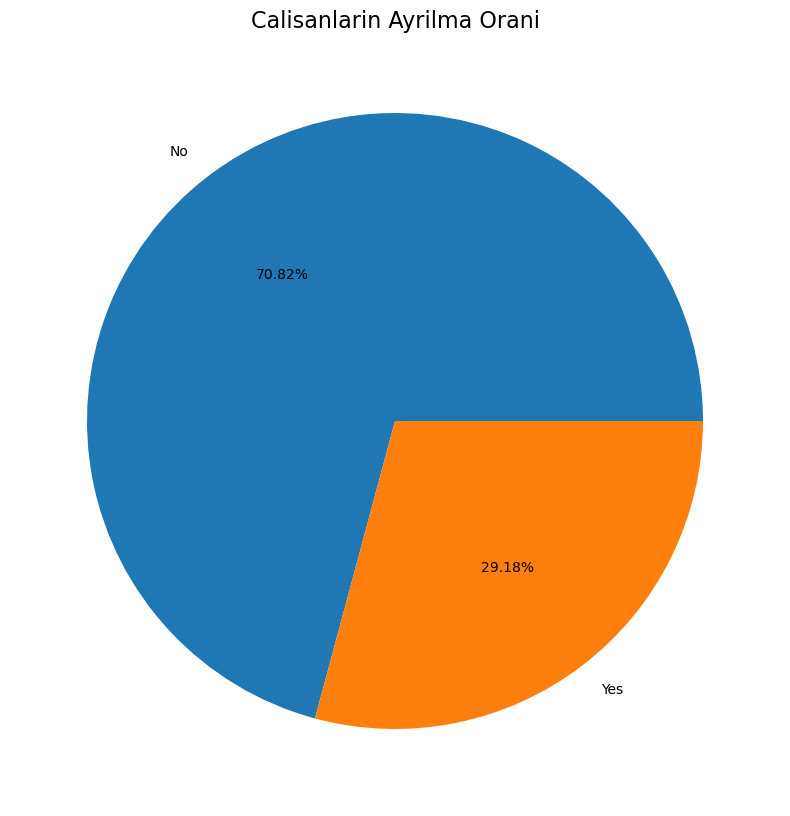

In [20]:
plt.figure(figsize= (14,10))
plt.pie(df["left"].value_counts(), labels=["No", "Yes"], autopct = "%.02f%%");

plt.title("Calisanlarin Ayrilma Orani", fontsize=16);
plt.show

## Key insights-2

<AxesSubplot:xlabel='tenure', ylabel='count'>

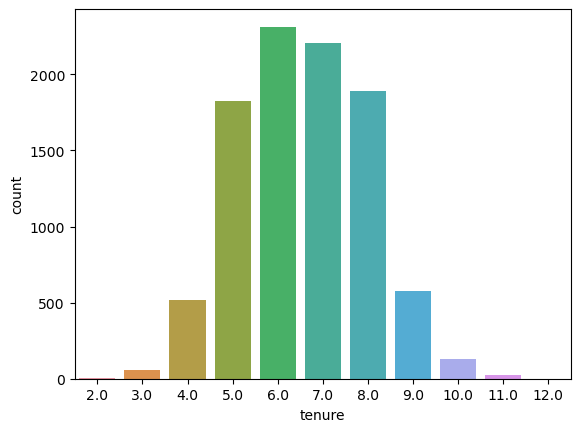

In [22]:
sns.countplot(data=df, x= df["tenure"])
#bu bana tenure sutununun grafigini cizdirdi 

<AxesSubplot:xlabel='tenure', ylabel='count'>

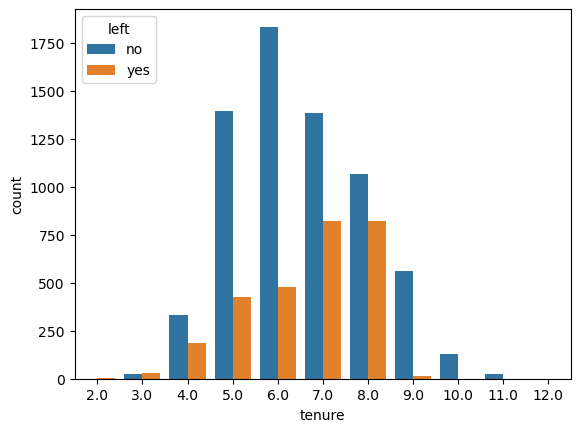

In [25]:
sns.countplot(data=df, x= df["tenure"], hue=df["left"])


#bu sekilde de tenure'u left'e gore gruplamis oluyor
#burdan bir cikarimda bulunuyoruz, ayrilanlar genelde, 7-8 yillik tecrubeye
#sahip calisanlardan olusuyor. onenmli bir birikim ve tecrube kaybi sirket icin

In [ ]:
plt.legend(loc = 2)

In [27]:
def left_by_tenure(df,low,high):
    df_in = df[(df["tenure"]<=high) & (df["tenure"]>=low)]["left"].value_counts()
    df_out = df[~((df["tenure"]<=high) & (df["tenure"]>=low))]["left"].value_counts()
    return (df_in/(df_in+df_out))["yes"]

In [28]:
left_by_tenure(df,5,8)
#5 ile 8 arasinda tenure'u olanlarin isten cikma oranini getir demis oluyorum

0.9166666666666666

In [29]:
left_by_tenure(df,4,8)
#bu da 4-8 arasi tenure olanlarin isten cikma orani
#yuzde98 cikiyor. epey bir tecrube kaybi

0.9834770114942529

In [32]:
df_tenure = df.groupby(["tenure","left"]).size().reset_index().pivot(columns = "tenure", index = "left", values = 0)
df_tenure
#size burda o sutunlarda hangi degerler var onun karsiligini getirmis oluyor
#hem pivotla hem groupby ile ayni ciktiyi alabiliyorum aslinda. 

tenure,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
left,,,,,,,,,,,
no,1.0,27.0,332.0,1395.0,1835.0,1386.0,1065.0,564.0,127.0,23.0,1.0
yes,2.0,30.0,186.0,428.0,478.0,823.0,823.0,14.0,NaN,NaN,NaN


In [33]:
df.groupby(["tenure", "left"]).left.agg("count").unstack().T
#bu da yukardaki cozumun 2. yolu.
#unstack yazmazsam series olarak donduruyordu.
#unstack diyerek df formatina getirdim. 
#T diyerek de transpose ettim ve istedigim formata cevirdim

tenure,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
left,,,,,,,,,,,
no,1.0,27.0,332.0,1395.0,1835.0,1386.0,1065.0,564.0,127.0,23.0,1.0
yes,2.0,30.0,186.0,428.0,478.0,823.0,823.0,14.0,NaN,NaN,NaN


<AxesSubplot:xlabel='tenure', ylabel='Count'>

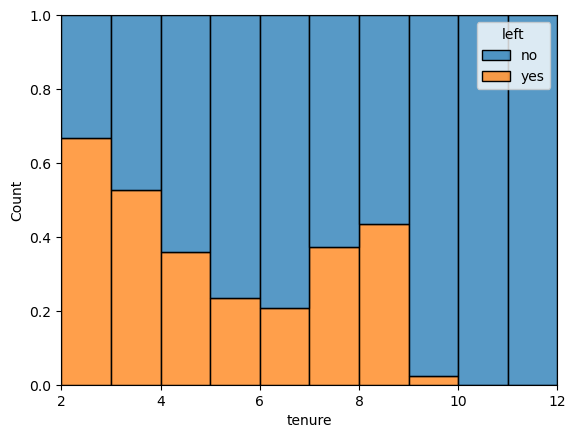

In [34]:
sns.histplot(x="tenure", hue="left", multiple="fill", data=df, binwidth=1)

In [36]:
df["department"].value_counts()

sales          1883
retail         1541
operations     1522
engineering    1516
marketing       802
support         735
admin           423
finance         402
logistics       360
IT              356
Name: department, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'operations'),
  Text(1, 0, 'support'),
  Text(2, 0, 'logistics'),
  Text(3, 0, 'sales'),
  Text(4, 0, 'IT'),
  Text(5, 0, 'admin'),
  Text(6, 0, 'engineering'),
  Text(7, 0, 'marketing'),
  Text(8, 0, 'finance'),
  Text(9, 0, 'retail')])

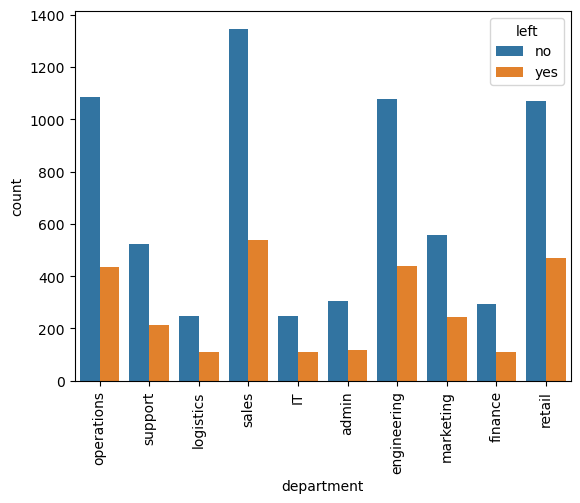

In [37]:
sns.countplot(data=df, x=df["department"], hue=df["left"])
plt.xticks(rotation=90)
#bu xticks de x axis'dekileri 90 derece rotate ediyor.
#45 dersem de 45 derece yapar.kac yazarsan o

## Key Insights-3

In [ ]:
sns.countplot

In [41]:
df["promoted"].value_counts(normalize=True)*100

0    96.97065
1     3.02935
Name: promoted, dtype: float64

<AxesSubplot:xlabel='promoted', ylabel='count'>

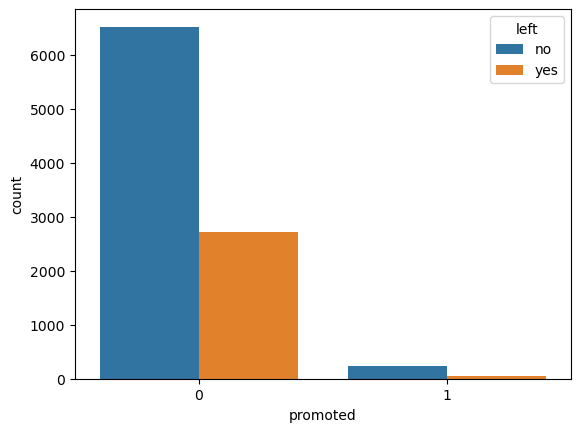

In [43]:
sns.countplot(data=df, x=df["promoted"], hue=df["left"])

In [39]:
df["bonus"].value_counts()

0    7517
1    2023
Name: bonus, dtype: int64

<AxesSubplot:xlabel='bonus', ylabel='count'>

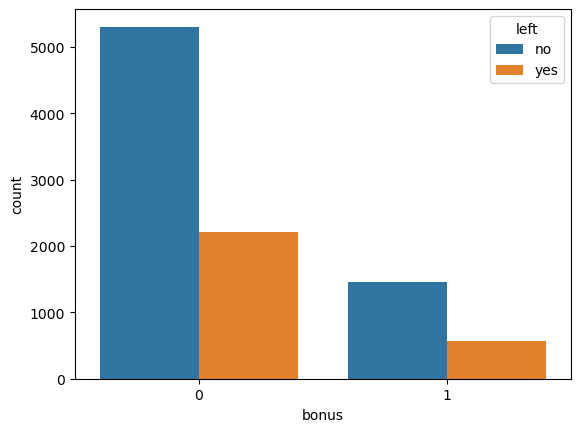

In [42]:
sns.countplot(data=df, x=df["bonus"], hue=df["left"])

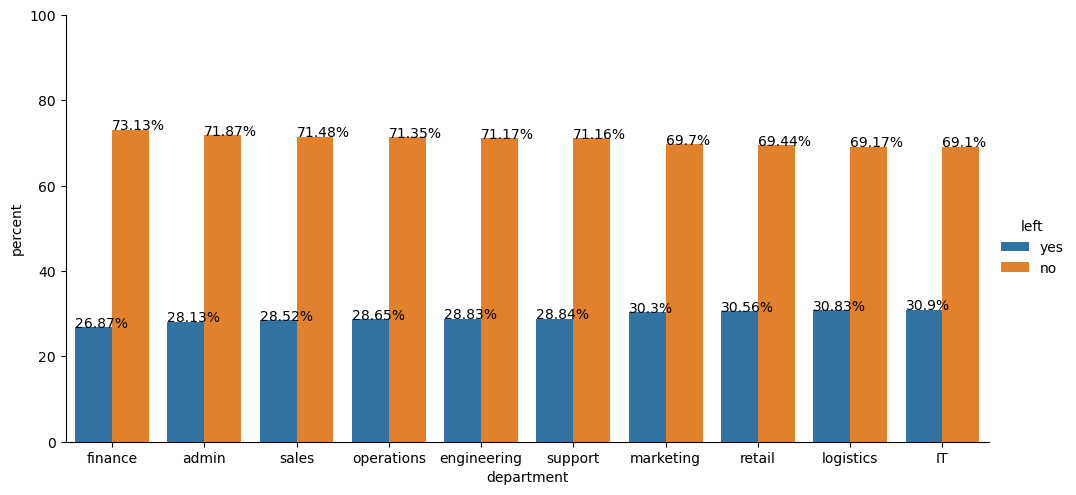

In [44]:
x,y = 'department', 'left'

df1 = df.groupby(x)[y].value_counts(normalize=True).sort_values()*100
# df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
#burda reset_index demezsem yapamiyor. 
#sort_values dedigim icin reset_index yapmam lazim

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height = 5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)